# Feature Engineering for Machine Learning in Python

# DATACAMP

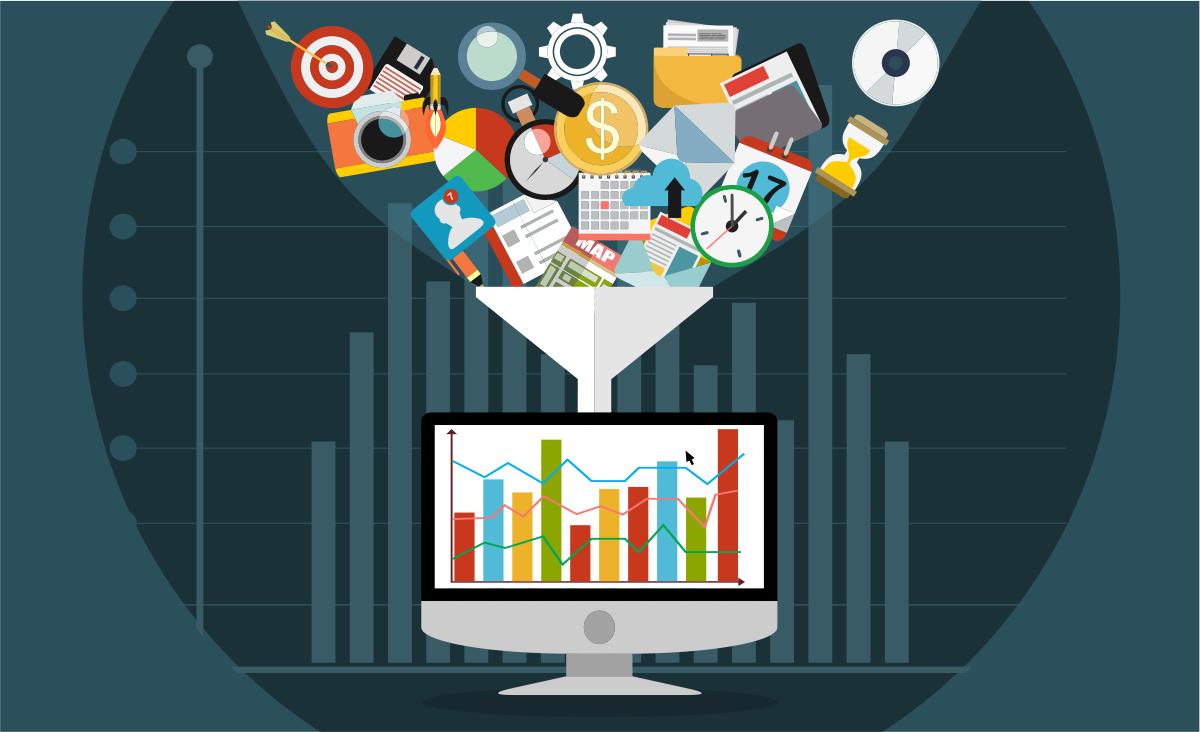

In [1]:
from IPython.display import Image
Image('fe.png')

# Course Description
Every day you read about the amazing breakthroughs in how the newest applications of machine learning are changing the world. Often this reporting glosses over the fact that a huge amount of data munging and feature engineering must be done before any of these fancy models can be used. In this course, you will learn how to do just that. You will work with Stack Overflow Developers survey, and historic US presidential inauguration addresses, to understand how best to preprocess and engineer features from categorical, continuous, and unstructured data. This course will give you hands-on experience on how to prepare any data for your own machine learning models.

# 1. Creating Features
In this chapter, you will explore what feature engineering is and how to get started with applying it to real-world data. You will load, explore and visualize a survey response dataset, and in doing so you will learn about its underlying data types and why they have an influence on how you should engineer your features. Using the pandas package you will create new features from both categorical and continuous columns.

In [16]:
# Getting to know your data
# 
# Pandas is one the most popular packages used to work with tabular data in Python. 
# It is generally imported using the alias pd and can be used to load a CSV (or other delimited files) using read_csv().
# 
# You will be working with a modified subset of the Stackoverflow survey response data 
# in the first three chapters of this course. This data set records the details, 
# and preferences of thousands of users of the StackOverflow website.
# 
# Instructions 1/4
# 
# Import the pandas library as pd.
# so_survey_csv contains the URL to a CSV file. Import it using Pandas into so_survey_df.

In [17]:
so_survey_csv = 'https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv'

In [18]:
# Import pandas
import pandas as pd

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

In [19]:
# Print the first five rows of so_survey_df.

In [20]:
# Import pandas
import pandas as pd

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

# Print the first five rows of the DataFrame
print(so_survey_df.head())

      SurveyDate                                    FormalEducation  \
0  2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1  6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2    6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3    5/9/18 1:06  Some college/university study without earning ...   
4  4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   

   ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0              NaN   Yes  South Africa                         NaN   
1          70841.0   Yes       Sweeden                         7.0   
2              NaN    No       Sweeden                         8.0   
3          21426.0   Yes       Sweeden                         NaN   
4          41671.0   Yes            UK                         8.0   

      VersionControl  Age  Years Experience Gender   RawSalary  
0                Git   21                13   Male         NaN  
1     Git;Subversion  

In [21]:
# Print the data type of each column in so_survey_df.

In [22]:
# Import pandas
import pandas as pd

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

# Print the first five rows of the DataFrame
print(so_survey_df.head())

# Print the data type of each column
print(so_survey_df.dtypes)

      SurveyDate                                    FormalEducation  \
0  2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1  6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2    6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3    5/9/18 1:06  Some college/university study without earning ...   
4  4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   

   ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0              NaN   Yes  South Africa                         NaN   
1          70841.0   Yes       Sweeden                         7.0   
2              NaN    No       Sweeden                         8.0   
3          21426.0   Yes       Sweeden                         NaN   
4          41671.0   Yes            UK                         8.0   

      VersionControl  Age  Years Experience Gender   RawSalary  
0                Git   21                13   Male         NaN  
1     Git;Subversion  

In [23]:
# Selecting specific data types
# 
# Often a data set will contain columns with several different data types 
# (like the one you are working with). The majority of machine learning models require 
# you to have a consistent data type across features. 
# Similarly, most feature engineering techniques are applicable to only one type of data at a time. 
# For these reasons among others, you will often want to be able to access just the columns 
# of certain types when working with a DataFrame.
# 
# The DataFrame (so_survey_df) from the previous exercise is available in your workspace.
# 
# Instructions
# Create a subset of so_survey_df consisting of only the numeric (int and float) columns.
# Print the column names contained in so_survey_df_num.

In [24]:
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend'], dtype='object')


In [29]:
# One-hot encoding and dummy variables
# 
# To use categorical variables in a machine learning model, 
# you first need to represent them in a quantitative way. 
# The two most common approaches are to one-hot encode the variables using or to use dummy variables. 
# In this exercise, you will create both types of encoding, and compare the created column sets. 
# We will continue using the same DataFrame from previous lesson loaded as so_survey_df and focusing on its Country column.
# 
# Instructions 1/2
# 1. One-hot encode the Country column, adding "OH" as a prefix for each column.

In [30]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Other', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA'],
      dtype='object')


In [31]:
# 2. Create dummy variables for the Country column, adding "DM" as a prefix for each column.

In [32]:
# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Other',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA'],
      dtype='object')


In [33]:
# Dealing with uncommon categories
# 
# Some features can have many different categories but a very uneven distribution of their occurrences. 
# Take for example Data Science's favorite languages to code in, some common choices are Python, R, and Julia, 
# but there can be individuals with bespoke choices, like FORTRAN, C etc. 
# In these cases, you may not want to create a feature for each value, 
# but only the more common occurrences.
# 
# Instructions 1/3
# 
# Extract the Country column of so_survey_df as a series and assign it to countries.
# Find the counts of each category in the newly created countries series.

In [34]:
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


In [35]:
# 2. Create a mask for values occurring less than 10 times in country_counts.
# Print the first 5 rows of the mask.

In [36]:
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Print the top 5 rows in the mask series
print(mask.head())

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool


In [38]:
# 3. Label values occurring less than the mask cutoff as 'Other'.
# Print the new category counts in countries.

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(pd.value_counts(countries))

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


In [51]:
# Binarizing columns
# 
# While numeric values can often be used without any feature engineering, 
# there will be cases when some form of manipulation can be useful. 
# For example on some occasions, you might not care about the magnitude of a value 
# but only care about its direction, or if it exists at all. 
# In these situations, you will want to binarize a column. 
# In the so_survey_df data, you have a large number of survey respondents 
# that are working voluntarily (without pay). 
# You will create a new column titled Paid_Job indicating whether 
# each person is paid (their salary is greater than zero).
# 
# Instructions
# 
# Create a new column called Paid_Job filled with zeros.
# Replace all the Paid_Job values with a 1 where the corresponding ConvertedSalary is greater than 0.

In [53]:
# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


In [54]:
# Binning values
# 
# For many continuous values you will care less about the exact value of a numeric column, 
# but instead care about the bucket it falls into. 
# This can be useful when plotting values, or simplifying your machine learning models. 
# It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.
# 
# Bins are created using pd.cut(df['column_name'], bins) where bins 
# can be an integer specifying the number of evenly spaced bins, or a list of bin boundaries.
# 
# Instructions 1/2
# 1. Bin the value of the ConvertedSalary column in so_survey_df into 5 equal bins, 
# in a new column called equal_binned.

In [55]:
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


In [56]:
# 2. Bin the ConvertedSalary column using the boundaries in the list bins and label the bins using labels.

In [57]:
# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins, labels = labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


# 3. Dealing with Messy Data

This chapter introduces you to the reality of messy and incomplete data. You will learn how to find where your data has missing values and explore multiple approaches on how to deal with them. You will also use string manipulation techniques to deal with unwanted characters in your dataset.

In [64]:
# How sparse is my data?
# 
# Most data sets contain missing values, often represented as NaN (Not a Number). 
# If you are working with Pandas you can easily check how many missing values exist in each column.
# 
# Let's find out how many of the developers taking the survey chose to enter their age 
# (found in the Age column of so_survey_df) and their gender (Gender column of so_survey_df).
# 
# Instructions 1/2
# Subset the DataFrame to only include the 'Age' and 'Gender' columns.
# Print the number of non-missing values in both columns.

In [65]:
# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Age       999 non-null int64
Gender    693 non-null object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [66]:
# Finding the missing values
# 
# While having a summary of how much of your data is missing can be useful, 
# often you will need to find the exact locations of these missing values. 
# Using the same subset of the StackOverflow data from the last exercise (sub_df), 
# you will show how a value can be flagged as missing.
# 
# Instructions 1/3
# 
# Print the first 10 entries of the DataFrame.

In [67]:
# Print the top 10 entries of the DataFrame
print(sub_df.head(10))

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN


In [68]:
# 2. Print the locations of the missing values in the first 10 rows.

In [69]:
# Print the locations of the missing values
print(sub_df.head(10).isnull())

     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True


In [70]:
# 3. Print the locations of the non-missing values in the first 10 rows.

In [71]:
# Print the locations of the non-missing values
print(sub_df.head(10).notnull())

    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


In [82]:
# Listwise deletion
# 
# The simplest way to deal with missing values in your dataset when they are occurring 
# entirely at random is to remove those rows, also called 'listwise deletion'.
# 
# Depending on the use case, you will sometimes want to remove all missing values 
# in your data while other times you may want to only remove 
# a particular column if too many values are missing in that column.
# 
# Instructions 1/4
# 1. Print the number of rows and columns in so_survey_df.

In [83]:
# Print the number of rows and columns
print(so_survey_df.shape)

(999, 14)


In [84]:
# 2. Drop all rows with missing values in so_survey_df.

In [85]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how='any')

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(370, 14)


In [73]:
# 3. Drop all columns with missing values in so_survey_df.

In [87]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 9)


In [74]:
# 4. Drop all rows in so_survey_df where 'Gender' is missing.

In [78]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 14)


In [81]:
# Replacing missing values with constants
# 
# While removing missing data entirely maybe a correct approach in many situations, 
# this may result in a lot of information being omitted from your models.
# 
# You may find categorical columns where the missing value is a valid piece of information in itself, 
# such as someone refusing to answer a question in a survey. 
# In these cases, you can fill all missing values with a new category entirely, 
# for example 'No response given'.
# 
# Instructions 1/2
# 
# Print the count of occurrences of each category in so_survey_df's Gender column.

In [88]:
# Print the count of occurrences
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Name: Gender, dtype: int64


In [89]:
# 2. Replace all missing values in the Gender column with the string 'Not Given'. Make changes to the original DataFrame.

In [90]:
# Replace missing values
so_survey_df['Gender'].fillna(value='Not Given', inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Name: Gender, dtype: int64


In [100]:
# Filling continuous missing values
# 
# In the last lesson, you dealt with different methods of removing 
# data missing values and filling in missing values with a fixed string. 
# These approaches are valid in many cases, particularly when dealing with categorical columns 
# but have limited use when working with continuous values. 
# In these cases, it may be most valid to fill the missing values in 
# the column with a value calculated from the entries present in the column.
# 
# Instructions 1/3
# 
# Print the first five rows of the StackOverflowJobsRecommend column of so_survey_df.

In [101]:
# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [96]:
# 2. Replace the missing values in the StackOverflowJobsRecommend column with its mean. 
# Make changes directly to the original DataFrame.

In [102]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [98]:
# 3. Round the decimal values that you introduced in the StackOverflowJobsRecommend column.

In [103]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [112]:
# Dealing with stray characters (I)
# 
# In this exercise, you will work with the RawSalary column of so_survey_df which contains 
# the wages of the respondents along with the currency symbols and commas, 
# such as $42,000. When importing data from Microsoft Excel, 
# more often that not you will come across data in this form.
# 
# Instructions 1/2
# Remove the commas (,) from the RawSalary column.

In [114]:
# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

In [115]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

In [116]:
# 2. Remove the dollar ($) signs from the RawSalary column.

In [117]:
# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

In [118]:
# Dealing with stray characters (II)
# 
# In the last exercise, you could tell quickly based off of the df.head() 
# call which characters were causing an issue. 
# In many cases this will not be so apparent. 
# There will often be values deep within a column that are preventing you 
# from casting a column as a numeric type so that it can be used in a model or further feature engineering.
# 
# One approach to finding these values is to force the column to 
# the data type desired using pd.to_numeric(), 
# coercing any values causing issues to NaN, 
# Then filtering the DataFrame by just the rows containing the NaN values.
# 
# Try to cast the RawSalary column as a float and it will fail as an additional character 
# can now be found in it. Find the character and remove it so the column can be cast as a float.
# 
# Instructions 1/2
# Attempt to convert the RawSalary column of so_survey_df to numeric values coercing all failures into null values.
# Find the indexes of the rows containing NaNs.
# Print the rows in RawSalary based on these indexes.

In [119]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

0             NaN
2             NaN
4       £41671.00
6             NaN
8             NaN
11            NaN
13            NaN
15      £75000.00
16      £10958.00
20            NaN
22            NaN
25            NaN
27            NaN
28            NaN
29            NaN
30            NaN
34            NaN
37            NaN
38      £90000.00
41            NaN
43            NaN
44            NaN
45            NaN
47      £48955.00
48            NaN
49      £19500.00
50            NaN
52            NaN
53      £36000.00
54            NaN
          ...    
925           NaN
926           NaN
927           NaN
929           NaN
934           NaN
936           NaN
937     £63156.00
938      £8496.00
941           NaN
942           NaN
944     £75000.00
948           NaN
949           NaN
952           NaN
954           NaN
955           NaN
960           NaN
961           NaN
962     £80286.00
964    £154000.00
966           NaN
975           NaN
976           NaN
977           NaN
980       

In [120]:
# 2. Did you notice the pound (£) signs in the RawSalary column? Remove these signs like you did in the previous exercise.
# Convert the RawSalary column to float.

In [121]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
5       120000.0
6            NaN
7       250000.0
8            NaN
9            0.0
10       47904.0
11           NaN
12       95968.0
13           NaN
14         420.0
15       75000.0
16       10958.0
17       51408.0
18       72611.0
19      900000.0
20           NaN
21       30000.0
22           NaN
23       44000.0
24       60000.0
25           NaN
26       80000.0
27           NaN
28           NaN
29           NaN
         ...    
969      37200.0
970      79973.0
971      73428.0
972      56298.0
973      17628.0
974     125000.0
975          NaN
976          NaN
977          NaN
978      75000.0
979       6576.0
980          NaN
981      60000.0
982      80000.0
983      90000.0
984      70000.0
985      39648.0
986      99967.0
987       2352.0
988      50448.0
989          NaN
990          NaN
991      55562.0
992          NaN
993      30000.0
994          NaN
995      58746.0
996      55000

In [122]:
# Method chaining
# 
# When applying multiple operations on the same column (like in the previous exercises), 
# you made the changes in several steps, assigning the results back in each step. 
# However, when applying multiple successive operations on the same column, 
# you can "chain" these operations together for clarity and ease of management. 
# This can be achieved by calling multiple methods sequentially:
# 
# # Method chaining
# df['column'] = df['column'].method1().method2().method3()
# 
# # Same as 
# df['column'] = df['column'].method1()
# df['column'] = df['column'].method2()
# df['column'] = df['column'].method3()
# In this exercise you will repeat the steps you performed in the last two exercises, but do so using method chaining.
# 
# Instructions
# 
# Remove the commas (,) from the RawSalary column of so_survey_df.
# Remove the dollar ($) signs from the RawSalary column.
# Remove the pound (£) signs from the RawSalary column.
# Convert the RawSalary column to float.

In [123]:
# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

In [124]:
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')
 
# Print the RawSalary column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
5       120000.0
6            NaN
7       250000.0
8            NaN
9            0.0
10       47904.0
11           NaN
12       95968.0
13           NaN
14         420.0
15       75000.0
16       10958.0
17       51408.0
18       72611.0
19      900000.0
20           NaN
21       30000.0
22           NaN
23       44000.0
24       60000.0
25           NaN
26       80000.0
27           NaN
28           NaN
29           NaN
         ...    
969      37200.0
970      79973.0
971      73428.0
972      56298.0
973      17628.0
974     125000.0
975          NaN
976          NaN
977          NaN
978      75000.0
979       6576.0
980          NaN
981      60000.0
982      80000.0
983      90000.0
984      70000.0
985      39648.0
986      99967.0
987       2352.0
988      50448.0
989          NaN
990          NaN
991      55562.0
992          NaN
993      30000.0
994          NaN
995      58746.0
996      55000

# 3. Conforming to Statistical Assumptions

In this chapter, you will focus on analyzing the underlying distribution of your data and whether it will impact your machine learning pipeline. You will learn how to deal with skewed data and situations where outliers may be negatively impacting your analysis.

In [141]:
# What does your data look like? (I)
# 
# Up until now you have focused on creating new features and dealing with issues in your data. 
# Feature engineering can also be used to make the most out of the data 
# that you already have and use it more effectively when creating machine learning models.
# Many algorithms may assume that your data is normally distributed, 
# or at least that all your columns are on the same scale. 
# This will often not be the case, e.g. one feature may be measured in thousands of dollars 
# while another would be number of years. 
# In this exercise, you will create plots to examine the distributions 
# of some numeric columns in the so_survey_df DataFrame, stored in so_numeric_df.
# 
# Instructions 1/3
# 
# Generate a histogram of all columns in the so_numeric_df DataFrame.

In [144]:
# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

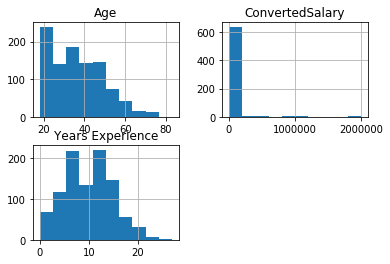

In [146]:
# Create a histogram
so_numeric_df.hist()
plt.show()

In [147]:
# 2. Generate box plots of the Age and Years Experience columns in the so_numeric_df DataFrame.

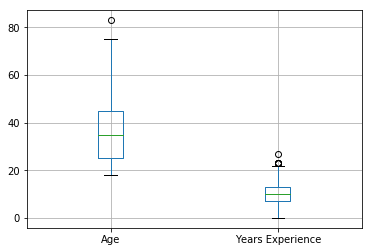

In [148]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

In [149]:
# 3. Generate a box plot of the ConvertedSalary column in the so_numeric_df DataFrame.

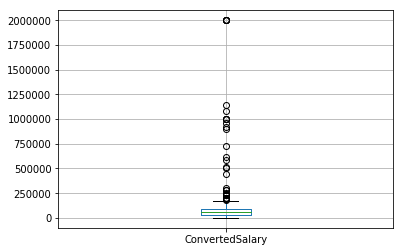

In [150]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

In [151]:
# What does your data look like? (II)
# 
# In the previous exercise you looked at the distribution of individual columns. 
# While this is a good start, a more detailed view of how different features interact 
# with each other may be useful as this can impact your decision on what to transform and how.
# 
# Instructions 1/2
# 
# Import matplotlib's pyplot module as plt.
# Import seaborn as sns.
# Plot pairwise relationships in the so_numeric_df dataset.
# Show the plot.

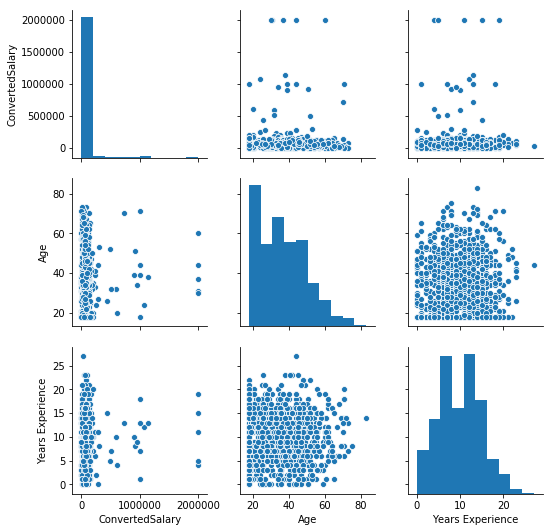

In [152]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

In [153]:
# 3. Print the summary statistics of the so_numeric_df DataFrame.

In [154]:
# Print summary statistics
print(so_numeric_df.describe())

       ConvertedSalary         Age  Years Experience
count     6.650000e+02  999.000000        999.000000
mean      9.256517e+04   36.003003          9.961962
std       2.091344e+05   13.255127          4.878129
min       0.000000e+00   18.000000          0.000000
25%       2.755000e+04   25.000000          7.000000
50%       5.556200e+04   35.000000         10.000000
75%       8.823800e+04   45.000000         13.000000
max       2.000000e+06   83.000000         27.000000


In [161]:
# Normalization
# 
# As discussed in the video, in normalization you linearly scale the entire column between 0 and 1,
# with 0 corresponding with the lowest value in the column, and 1 with the largest.
# When using scikit-learn (the most commonly used machine learning library in Python) 
# you can use a MinMaxScaler to apply normalization. 
# (It is called this as it scales your values between a minimum and maximum value.)
# 
# Instructions
# 
# Import MinMaxScaler from sklearn's preprocessing module.
# Instantiate the MinMaxScaler() as MM_scaler.
# Fit the MinMaxScaler on the Age column of so_numeric_df.
# Transform the same column with the scaler you just fit.

In [162]:
import warnings
warnings.filterwarnings("ignore")

In [163]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


In [164]:
# Standardization
# 
# While normalization can be useful for scaling a column between two data points, 
# it is hard to compare two scaled columns if even one of them is overly affected by outliers. 
# One commonly used solution to this is called standardization, 
# where instead of having a strict upper and lower bound, you center the data around its mean, 
# and calculate the number of standard deviations away from mean each data point is.
# 
# Instructions
# 
# Import StandardScaler from sklearn's preprocessing module.
# Instantiate the StandardScaler() as SS_scaler.
# Fit the StandardScaler on the Age column of so_numeric_df.
# Transform the same column with the scaler you just fit.

In [165]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


In [166]:
# Log transformation
# 
# In the previous exercises you scaled the data linearly, which will not affect the data's shape. 
# This works great if your data is normally distributed 
# (or closely normally distributed), an assumption that a lot of machine learning models make. 
# Sometimes you will work with data that closely conforms to normality, 
# e.g the height or weight of a population. 
# On the other hand, many variables in the real world do not follow this pattern e.g, 
# wages or age of a population. In this exercise you will use a log transform 
# on the ConvertedSalary column in the so_numeric_df DataFrame 
# as it has a large amount of its data centered around the lower values, 
# but contains very high values also. These distributions are said to have a long right tail.
# 
# Instructions
# 
# Import PowerTransformer from sklearn's preprocessing module.
# Instantiate the PowerTransformer() as pow_trans.
# Fit the PowerTransformer on the ConvertedSalary column of so_numeric_df.
# Transform the same column with the scaler you just fit.

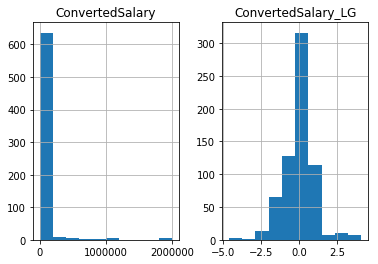

In [167]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

In [170]:
# Percentage based outlier removal
# 
# One way to ensure a small portion of data is not having an overly adverse effect is 
# by removing a certain percentage of the largest and/or smallest values in the column. 
# This can be achieved by finding the relevant quantile and trimming the data using it with a mask. 
# This approach is particularly useful if you are concerned that the highest values 
# in your dataset should be avoided. When using this approach, 
# you must remember that even if there are no outliers, 
# this will still remove the same top N percentage from the dataset.
# 
# Instructions
# 
# Find the 95th quantile of the ConvertedSalary column.
# Trim the so_numeric_df DataFrame to retain all rows where ConvertedSalary is less than it's 95th quantile.
# Plot the histogram of so_numeric_df[['ConvertedSalary']].
# Plot the histogram of trimmed_df[['ConvertedSalary']].

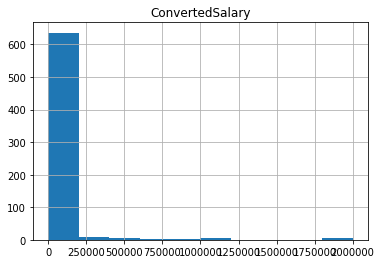

<Figure size 432x288 with 0 Axes>

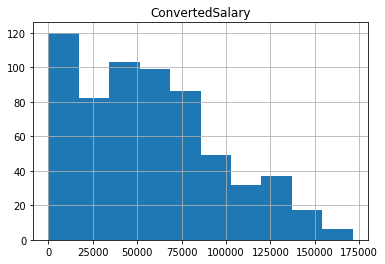

In [171]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

In [172]:
# Statistical outlier removal
# 
# While removing the top N% of your data is useful for ensuring that very spurious points are removed, 
# it does have the disadvantage of always removing the same proportion of points, 
# even if the data is correct. A commonly used alternative approach is to remove data 
# that sits further than three standard deviations from the mean. 
# You can implement this by first calculating the mean and standard deviation 
# of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. 
# This method ensures that only data that is genuinely different from the rest is removed, 
# and will remove fewer points if the data is close together.
# 
# Instructions
# 
# Calculate the standard deviation and mean of the ConvertedSalary column of so_numeric_df.
# Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions.
# Trim the so_numeric_df DataFrame to retain all rows where ConvertedSalary is within the lower and upper bounds.

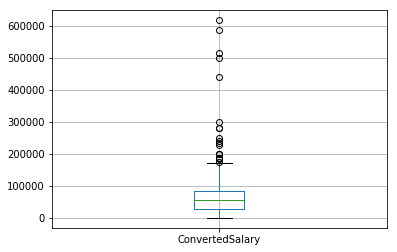

In [173]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

In [178]:
# Train and testing transformations (I)
# 
# So far you have created scalers based on a column, 
# and then applied the scaler to the same data that it was trained on. 
# When creating machine learning models you will generally build your models on historic data 
# (train set) and apply your model to new unseen data (test set). 
# In these cases you will need to ensure that the same scaling 
# is being applied to both the training and test data.
# 
# To do this in practice you train the scaler on the train set, 
# and keep the trained scaler to apply it to the test set. 
# You should never retrain a scaler on the test set.
# 
# For this exercise and the next, we split the so_numeric_df DataFrame into train 
# (so_train_numeric) and test (so_test_numeric) sets.
# 
# Instructions
# 
# Instantiate the StandardScaler() as SS_scaler.
# Fit the StandardScaler on the Age column.
# Transform the Age column in the test set (so_test_numeric).

In [179]:
from sklearn.model_selection import train_test_split
so_train_numeric, so_test_numeric = train_test_split(so_numeric_df, test_size=0.3, random_state=42)

In [180]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
453   29 -0.527031
793   25 -0.832435
209   46  0.770939
309   18 -1.366893
740   26 -0.756084


In [181]:
# Train and testing transformations (II)
# 
# Similar to applying the same scaler to both your training and test sets, 
# if you have removed outliers from the train set, 
# you probably want to do the same on the test set as well. 
# Once again you should ensure that you use the thresholds calculated only from 
# the train set to remove outliers from the test set.
# 
# Similar to the last exercise, we split the so_numeric_df DataFrame into train 
# (so_train_numeric) and test (so_test_numeric) sets.
# 
# Instructions
# 
# Calculate the standard deviation and mean of the ConvertedSalary column.
# Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions.
# Trim the so_test_numeric DataFrame to retain all rows where ConvertedSalary is within the lower and upper bounds.

In [182]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

# 4. Dealing with Text Data

Finally, in this chapter, you will work with unstructured text data, understanding ways in which you can engineer columnar features out of a text corpus. You will compare how different approaches may impact how much context is being extracted from a text, and how to balance the need for context, without too many features being created.

In [183]:
speech_df = pd.read_excel('df.xlsx')

In [184]:
speech_df

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by t...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, ..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to ...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualific..."
5,James Madison,First Inaugural Address,"Saturday, March 4, 1809",UNWILLING to depart from examples of the most...
6,James Madison,Second Inaugural Address,"Thursday, March 4, 1813",ABOUT to add the solemnity of an oath to the ...
7,James Monroe,First Inaugural Address,"Tuesday, March 4, 1817",I SHOULD be destitute of feeling if I was not...
8,James Monroe,Second Inaugural Address,"Monday, March 5, 1821",Fellow-Citizens: I SHALL not attempt to desc...
9,John Quincy Adams,Inaugural Address,"Friday, March 4, 1825",IN compliance with an usage coeval with the e...


In [201]:
# Cleaning up your text
# 
# Unstructured text data cannot be directly used in most analyses. 
# Multiple steps need to be taken to go from a long free form string to a set of numeric columns 
# in the right format that can be ingested by a machine learning model. 
# The first step of this process is to standardize the data and eliminate any characters 
# that could cause problems later on in your analytic pipeline.
# 
# In this chapter you will be working with a new dataset containing the inaugural speeches 
# of the presidents of the United States loaded as speech_df, with the speeches stored in the text column.
# 
# Instructions 1/2
# Print the first 5 rows of the text column to see the free text fields.

In [202]:
# Print the first 5 rows of the text column
print(speech_df['text'].head())

0    Fellow-Citizens of the Senate and of the House...
1     Fellow Citizens:  I AM again called upon by t...
2     WHEN it was first perceived, in early times, ...
3     Friends and Fellow-Citizens:  CALLED upon to ...
4     PROCEEDING, fellow-citizens, to that qualific...
Name: text, dtype: object


In [203]:
# 2. Replace all non letter characters in the text column with a whitespace.
# Make all characters in the newly created text_clean column lower case.

In [204]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house   
1     fellow citizens   i am again called upon by t...
2     when it was first perceived  in early times  ...
3     friends and fellow citizens   called upon to ...
4     proceeding  fellow citizens  to that qualific...
Name: text_clean, dtype: object


In [205]:
# High level text features
# 
# Once the text has been cleaned and standardized you can begin creating features from the data. 
# The most fundamental information you can calculate about free form text is its size, 
# such as its length and number of words. In this exercise (and the rest of this chapter), 
# you will focus on the cleaned/transformed text column (text_clean) you created in the last exercise.
# 
# Instructions
# 
# Record the character length of each speech in the char_count column.
# Record the word count of each speech in the word_count column.
# Record the average word length of each speech in the avg_word_length column.

In [206]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

                                           text_clean  char_cnt  word_cnt  \
0   fellow citizens of the senate and of the house           49         9   
1    fellow citizens   i am again called upon by t...        50         9   
2    when it was first perceived  in early times  ...        50         9   
3    friends and fellow citizens   called upon to ...        50         8   
4    proceeding  fellow citizens  to that qualific...        50         6   
5    unwilling to depart from examples of the most...        50         8   
6    about to add the solemnity of an oath to the ...        50        11   
7    i should be destitute of feeling if i was not...        50        10   
8    fellow citizens   i shall not attempt to desc...        50         8   
9    in compliance with an usage coeval with the e...        50         9   
10   fellow citizens   about to undertake the ardu...        50         7   
11   fellow citizens   the will of the american pe...        50         8   

In [207]:
# Counting words (I)
# 
# Once high level information has been recorded you can begin creating features 
# based on the actual content of each text. One way to do this is to approach it in a similar way 
# to how you worked with categorical variables in the earlier lessons.
# 
# For each unique word in the dataset a column is created.
# For each entry, the number of times this word occurs is counted and 
# the count value is entered into the respective column.
# These "count" columns can then be used to train machine learning models.
# 
# Instructions
# 
# Import CountVectorizer from sklearn.feature_extraction.text.
# Instantiate CountVectorizer and assign it to cv.
# Fit the vectorizer to the text_clean column.
# Print the feature names generated by the vectorizer.

In [208]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names())

['abo', 'about', 'add', 'again', 'ago', 'all', 'alone', 'am', 'american', 'americans', 'an', 'and', 'anyone', 'appear', 'appearing', 'arduo', 'assembled', 'at', 'attempt', 'be', 'been', 'before', 'bega', 'begin', 'biden', 'burger', 'by', 'called', 'can', 'carter', 'celebrate', 'certain', 'chairman', 'change', 'cheney', 'chief', 'citizens', 'clinton', 'coeval', 'comp', 'compliance', 'constitutional', 'contemplate', 'countrymen', 'current', 'day', 'depart', 'descr', 'destitute', 'dirksen', 'distinguished', 'each', 'early', 'earth', 'elected', 'emin', 'ex', 'examples', 'expect', 'expression', 'feel', 'feeling', 'fel', 'fellow', 'first', 'for', 'four', 'frie', 'friends', 'from', 'government', 'guests', 'had', 'has', 'hatfield', 'have', 'he', 'here', 'highest', 'house', 'humb', 'if', 'in', 'inaugurate', 'inauguration', 'is', 'it', 'johnson', 'jus', 'justice', 'last', 'manda', 'mathias', 'membe', 'met', 'mo', 'most', 'mr', 'my', 'myself', 'myst', 'nation', 'national', 'no', 'not', 'oa', 'oat

In [209]:
# Counting words (II)
# 
# Once the vectorizer has been fit to the data, 
# it can be used to transform the text to an array representing the word counts. 
# This array will have a row per block of text and a column for each of the features 
# generated by the vectorizer that you observed in the last exercise.
# 
# The vectorizer to you fit in the last exercise (cv) is available in your workspace.
# 
# Instructions 1/2
# 
# Apply the vectorizer to the text_clean column.
# Convert this transformed (sparse) array into a numpy array with counts.

In [210]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()
print(cv_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [211]:
# Print the dimensions of this numpy array.

In [212]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()

# Print the shape of cv_array
print(cv_array.shape)

(58, 180)


In [213]:
# Limiting your features
# 
# As you have seen, using the CountVectorizer with its default settings creates 
# a feature for every single word in your corpus. This can create far too many features, 
# often including ones that will provide very little analytical value.
# 
# For this purpose CountVectorizer has parameters that you can set to reduce the number of features:
# 
# min_df : Use only words that occur in more than this percentage of documents. 
# This can be used to remove outlier words that will not generalize across texts.
# 
# max_df : Use only words that occur in less than this percentage of documents. 
# This is useful to eliminate very common words that occur in every corpus without adding value such as "and" or "the".
# 
# Instructions
# 
# Limit the number of features in the CountVectorizer by setting the minimum number 
# of documents a word can appear to 20% and the maximum to 80%.
# 
# Fit and apply the vectorizer on text_clean column in one step.
# Convert this transformed (sparse) array into a numpy array with counts.
# Print the dimensions of the new reduced array.

In [214]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2, max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 6)


In [215]:
# Text to DataFrame
# 
# Now that you have generated these count based features in an array you will need to reformat them 
# so that they can be combined with the rest of the dataset. 
# This can be achieved by converting the array into a pandas DataFrame, 
# with the feature names you found earlier as the column names, and then concatenate it with the original DataFrame.
# 
# The numpy array (cv_array) and the vectorizer (cv) you fit in the last exercise are available in your workspace.
# 
# Instructions
# 
# Create a DataFrame cv_df containing the cv_array as the values and the feature names as the column names.
# Add the prefix Counts_ to the column names for ease of identification.
# Concatenate this DataFrame (cv_df) to the original DataFrame (speech_df) column wise.

In [216]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                      Name          Inaugural Address  \
0        George Washington    First Inaugural Address   
1        George Washington   Second Inaugural Address   
2               John Adams          Inaugural Address   
3         Thomas Jefferson    First Inaugural Address   
4         Thomas Jefferson   Second Inaugural Address   

                           Date  \
0      Thursday, April 30, 1789   
1         Monday, March 4, 1793   
2       Saturday, March 4, 1797   
3      Wednesday, March 4, 1801   
4         Monday, March 4, 1805   

                                                text  \
0  Fellow-Citizens of the Senate and of the House...   
1   Fellow Citizens:  I AM again called upon by t...   
2   WHEN it was first perceived, in early times, ...   
3   Friends and Fellow-Citizens:  CALLED upon to ...   
4   PROCEEDING, fellow-citizens, to that qualific...   

                                          text_clean  char_cnt  word_cnt  \
0  fellow citizens of the senate 

In [217]:
# Tf-idf
# 
# While counts of occurrences of words can be useful to build models, 
# words that occur many times may skew the results undesirably. 
# To limit these common words from overpowering your model a form of normalization can be used. 
# In this lesson you will be using Term frequency-inverse document frequency (Tf-idf) 
# as was discussed in the video. Tf-idf has the effect of reducing the value of common words, 
# while increasing the weight of words that do not occur in many documents.
# 
# Instructions
# 
# Import TfidfVectorizer from sklearn.feature_extraction.text.
# Instantiate TfidfVectorizer while limiting the number of features to 100 and removing English stop words.
# Fit and apply the vectorizer on text_clean column in one step.
# Create a DataFrame tv_df containing the weights of the words and the feature names as the column names.

In [218]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_add  TFIDF_ago  TFIDF_american  TFIDF_americans  TFIDF_appear  \
0        0.0        0.0             0.0              0.0           0.0   
1        0.0        0.0             0.0              0.0           0.0   
2        0.0        0.0             0.0              0.0           0.0   
3        0.0        0.0             0.0              0.0           0.0   
4        0.0        0.0             0.0              0.0           0.0   

   TFIDF_appearing  TFIDF_arduo  TFIDF_assembled  TFIDF_attempt  TFIDF_bega  \
0              0.0          0.0              0.0            0.0         0.0   
1              0.0          0.0              0.0            0.0         0.0   
2              0.0          0.0              0.0            0.0         0.0   
3              0.0          0.0              0.0            0.0         0.0   
4              0.0          0.0              0.0            0.0         0.0   

   ...  TFIDF_times  TFIDF_today  TFIDF_undertake  TFIDF_united  \
0  ...      0

In [219]:
# Inspecting Tf-idf values
# 
# After creating Tf-idf features you will often want to understand what are 
# the most highest scored words for each corpus. This can be achieved by isolating 
# the row you want to examine and then sorting the the scores from high to low.
# 
# The DataFrame from the last exercise (tv_df) is available in your workspace.
# 
# Instructions
# 
# Assign the first row of tv_df to sample_row.
# sample_row is now a series of weights assigned to words. Sort these values to print the top 5 highest-rated words.

In [220]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_senate      0.871280
TFIDF_citizens    0.354065
TFIDF_fellow      0.339865
TFIDF_years       0.000000
TFIDF_earth       0.000000
Name: 0, dtype: float64


In [221]:
# Transforming unseen data
# 
# When creating vectors from text, any transformations that you perform before training a machine learning model, 
# you also need to apply on the new unseen (test) data. 
# To achieve this follow the same approach from the last chapter: fit the vectorizer only on the training data, 
# and apply it to the test data.
# 
# For this exercise the speech_df DataFrame has been split in two:
# 
# train_speech_df: The training set consisting of the first 45 speeches.
# test_speech_df: The test set consisting of the remaining speeches.
# Instructions
# 
# Instantiate TfidfVectorizer.
# Fit the vectorizer and apply it to the text_clean column.
# Apply the same vectorizer on the text_clean column of the test data.
# Create a DataFrame of these new features from the test set.

In [222]:
train_speech_df, test_speech_df = train_test_split(speech_df, test_size=0.3, random_state=42)

In [223]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

   TFIDF_abo  TFIDF_american  TFIDF_appearing  TFIDF_arduo  TFIDF_assembled  \
0        0.0             0.0              0.0          0.0              0.0   
1        0.0             0.0              0.0          0.0              0.0   
2        0.0             0.0              0.0          0.0              0.0   
3        0.0             0.0              0.0          0.0              0.0   
4        0.0             0.0              0.0          0.0              0.0   

   TFIDF_begin  TFIDF_biden  TFIDF_burger  TFIDF_called  TFIDF_carter  ...  \
0          0.0          0.0           0.0           0.0           0.0  ...   
1          0.0          0.0           0.0           0.0           0.0  ...   
2          0.0          0.0           0.0           0.0           0.0  ...   
3          0.0          0.0           0.0           1.0           0.0  ...   
4          0.0          0.0           0.0           0.0           0.0  ...   

   TFIDF_times  TFIDF_today  TFIDF_undertake  TFIDF_unit

In [224]:
# Using longer n-grams
# 
# So far you have created features based on individual words in each of the texts. 
# This can be quite powerful when used in a machine learning model but you may be concerned 
# that by looking at words individually a lot of the context is being ignored. 
# To deal with this when creating models you can use n-grams which are sequence of n words grouped together. For example:
# 
# bigrams: Sequences of two consecutive words
# trigrams: Sequences of two consecutive words
# These can be automatically created in your dataset by specifying the ngram_range argument as 
# a tuple (n1, n2) where all n-grams in the n1 to n2 range are included.
# 
# Instructions
# 
# Import CountVectorizer from sklearn.feature_extraction.text.
# Instantiate CountVectorizer while considering only trigrams.
# Fit the vectorizer and apply it to the text_clean column in one step.
# Print the feature names generated by the vectorizer.

In [225]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range = (3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['add solemnity oath', 'ago met inaugurate', 'american people highest', 'biden mr chief', 'burger vice pr', 'called retirement supposed', 'certain fellow americans', 'chairman mr vice', 'change government bega', 'cheney mr chief', 'chief justice burger', 'chief justice fel', 'chief justice membe', 'chief justice mr', 'chief justice pres', 'chief justice roberts', 'citizens american peo', 'citizens appear day', 'citizens assembled repeat', 'citizens called th', 'citizens obedience manda', 'citizens people earth', 'citizens practice predec', 'citizens presence vast', 'citizens senate house', 'citizens shall attempt', 'citizens stand day', 'citizens stand today', 'citizens undertake arduo', 'citizens united states', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens obedience', 'fellow citizens presence', 'fellow citizens presidential', 'fellow citizens providence', 'fellow citizens qualifica', 'fellow citizens senate', 'fellow citizens shall', 'fellow citizens solici

In [226]:
# Finding the most common words
# Its always advisable once you have created your features to inspect them 
# to ensure that they are as you would expect. 
# his will allow you to catch errors early, 
# and perhaps influence what further feature engineering you will need to do.
# 
# The vectorizer (cv) you fit in the last exercise and the sparse array consisting of word counts 
# (cv_trigram) is available in your workspace.
# 
# Instructions
# 
# Create a DataFrame of the features (word counts).
# Add the counts of word occurrences and print the top 5 most occurring words.

In [227]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                         columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_mr chief justice          7
Counts_chief justice mr          4
Counts_mr vice president         3
Counts_vice president mr         2
Counts_citizens united states    2
dtype: int64


# END OF THIS EXELLENT COURSE

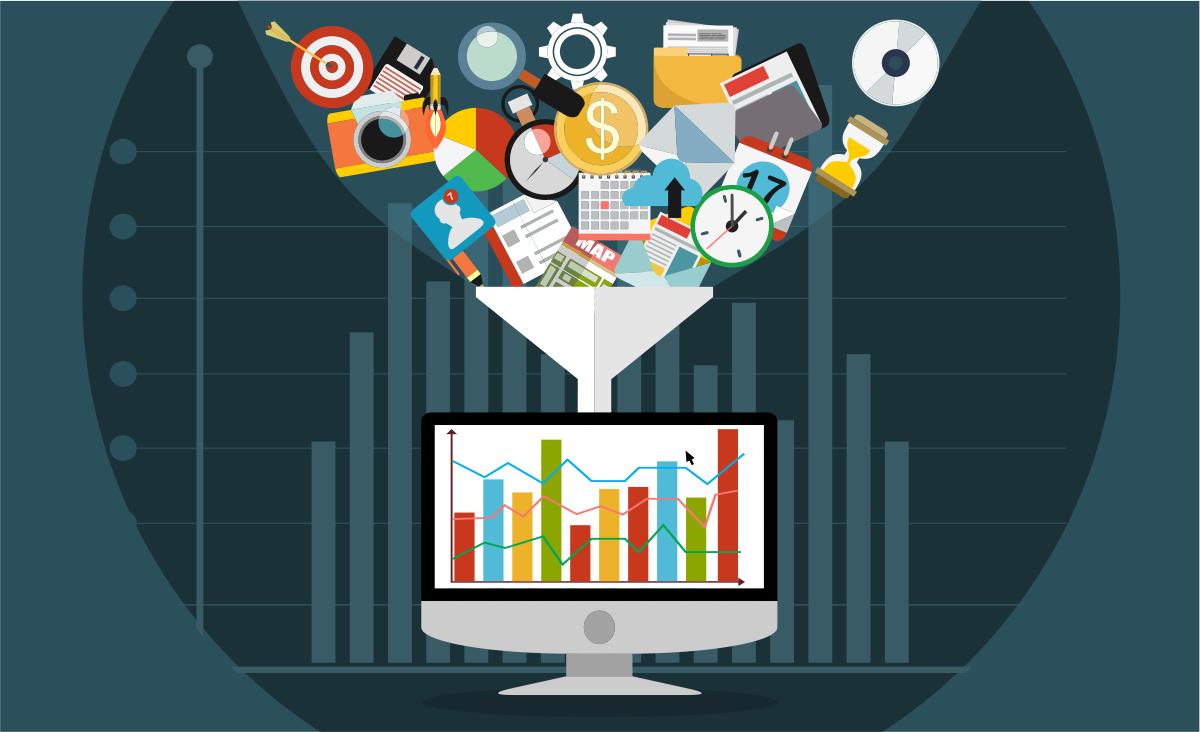

In [228]:
Image('fe.png')